 # Proyecto Mecánica de Fluidos Grupo 13

#### Obtención de la información a partir de la base de datos

Se importa la base de datos con la que se hará el estudio de las propiedades turbulentas del flujo dado

In [1]:
import scipy.io as sio
import numpy as np
data = sio.loadmat('data.mat')
x = data['x']
y = data['y']
u = data['u']
v = data['v']

Diccionario con parámetros del agua en las condiciones del experimento (Fuente: Frank M. White Fluid Mechanics 7th Edition page 27 Table 1.4 "Viscosity and kinematic viscosity of eight fluids at 1 atm and 20°C") (Citar en APA después)

In [22]:
agua = {"densidad": 998,  # kg/m3
        "viscocidad dinámica": 1 * (10 ** -3), # kg/(m * s)
        "viscocidad cinemática": 1.01 * (10 ** -6), # m2/s
        "diametro": 0.021} # m
tiempo = (1/1949) * np.arange(39999)

Se grafican todos los puntos del espacio, para tener una idea de las mediciones que se hicieron

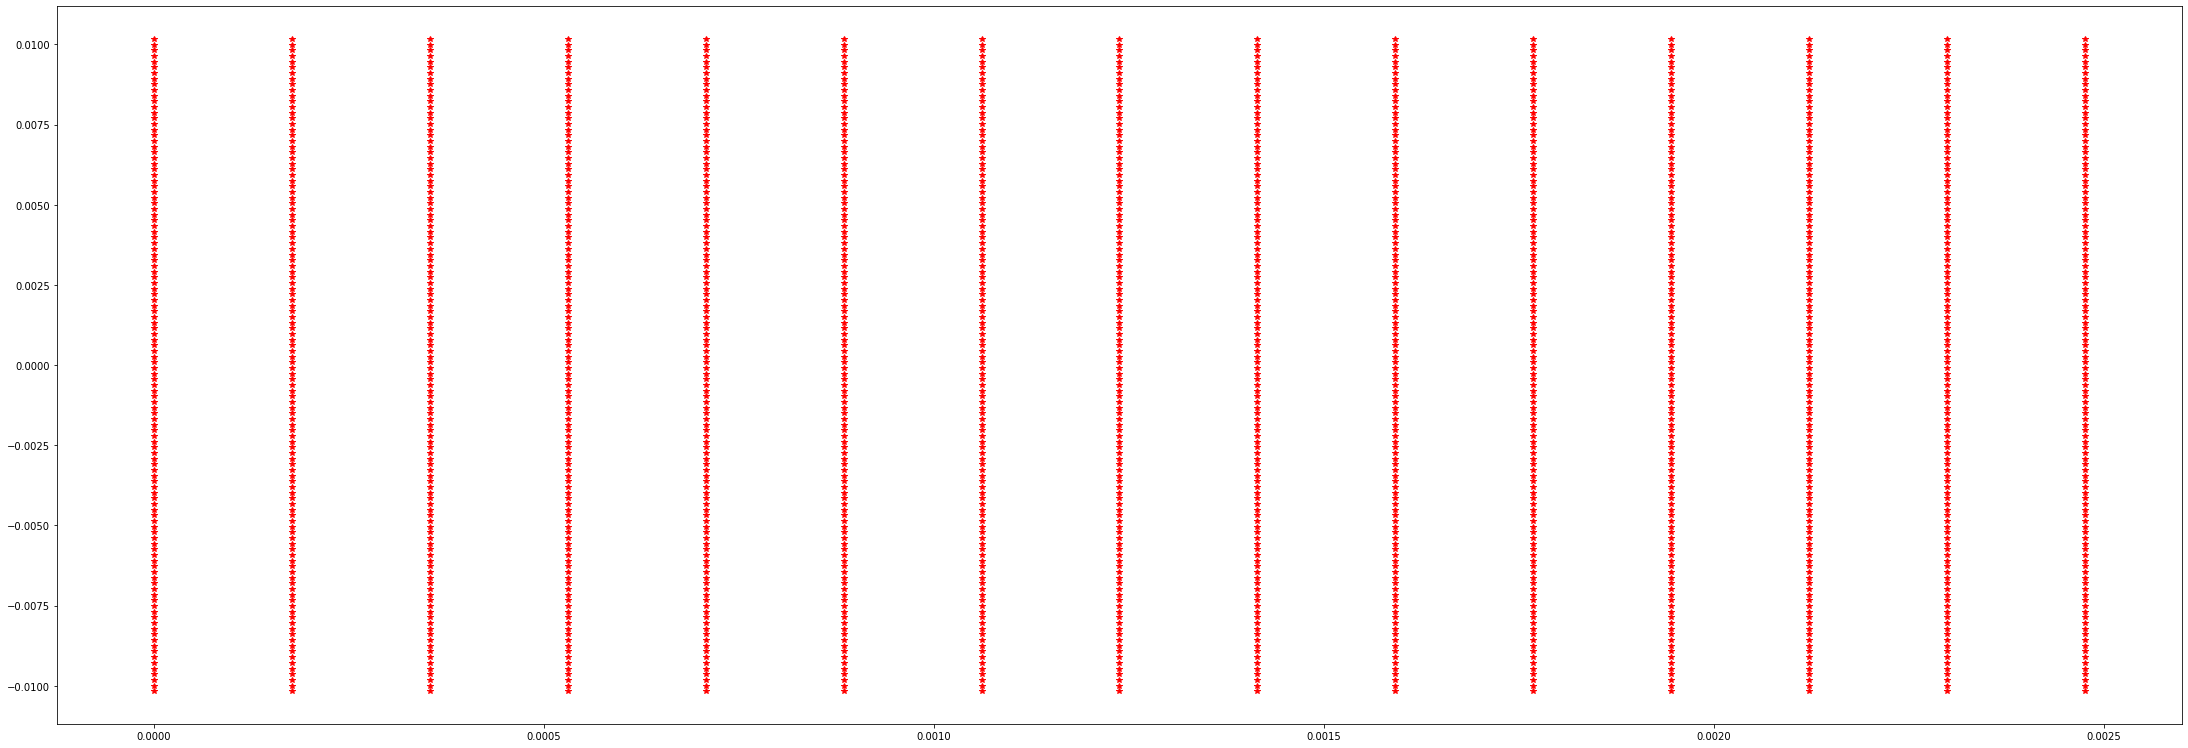

In [4]:
import matplotlib.pyplot as plt
# Vamos a graficar todos los puntos muestreados

plt.rcParams["figure.figsize"] = [30.50, 10.50]
plt.rcParams["figure.autolayout"] = True
plt.plot(x,y,'r*')
plt.show()

Se grafica el perfil de velocidad medio obtenido

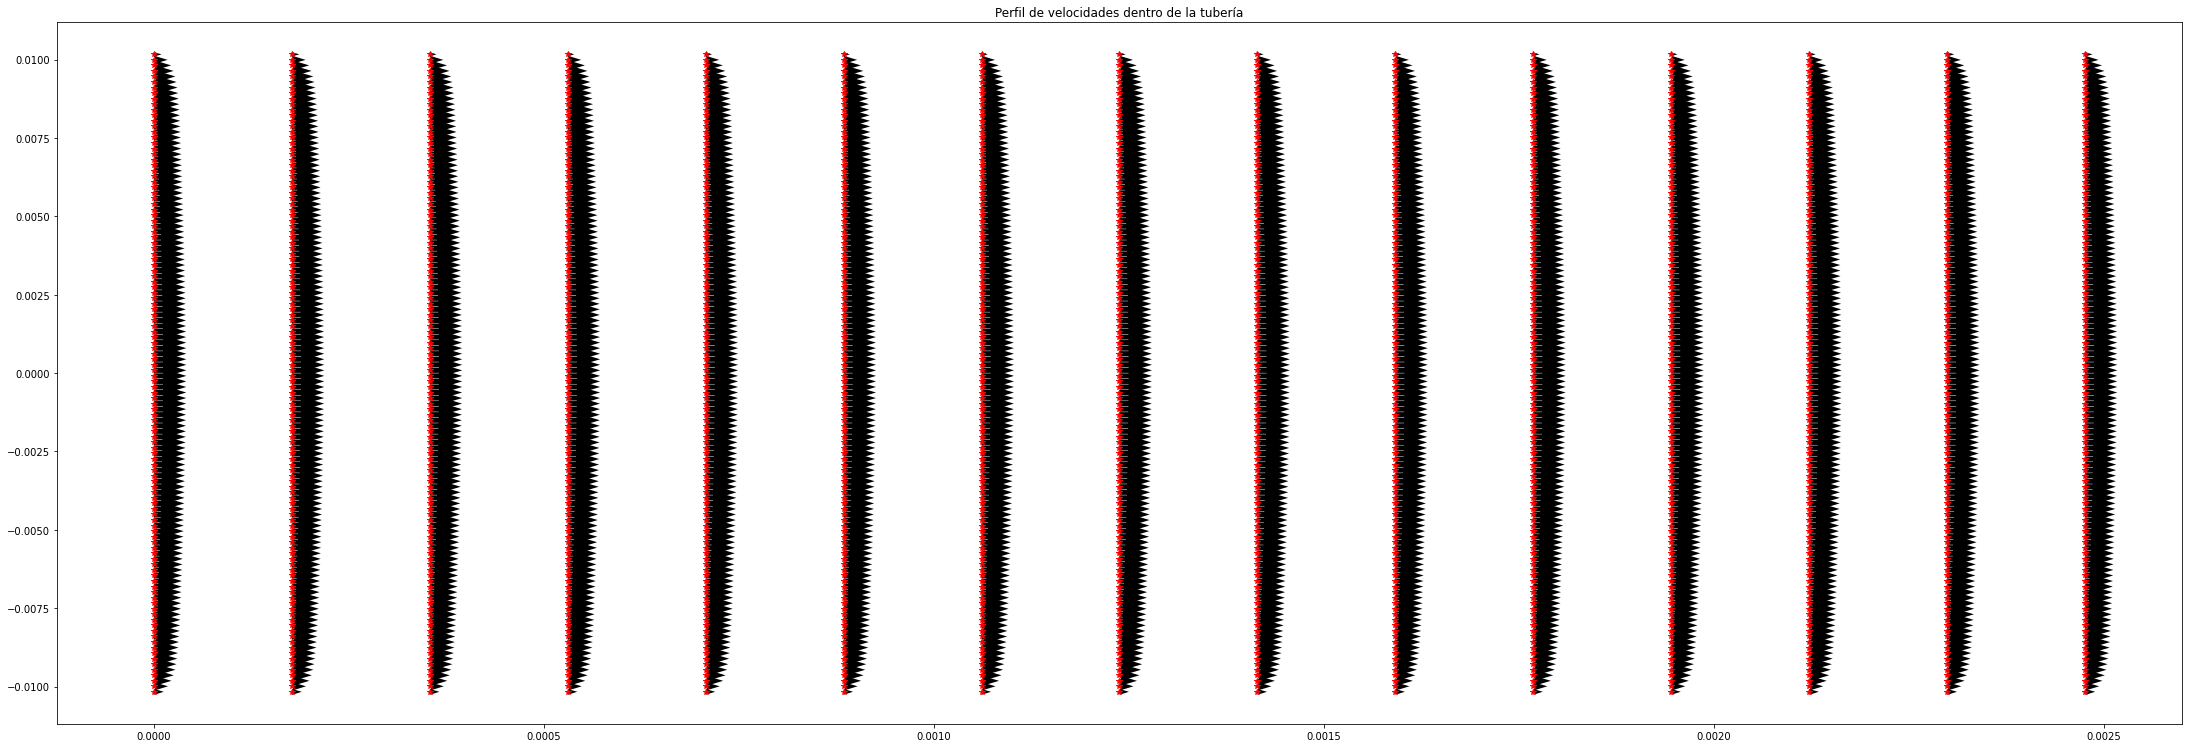

In [5]:
def perfil_velocidad(V_x, V_y):

    long_promedio = [] # Velocidades longitudinales promedio en cada punto
    vert_promedio = [] # Velocidades transversales promedio en cada punto
    for i in range(116):
        lista_1 = []
        lista_2 = []
        for j in range(15):
            lista_1.append(np.mean(np.array(V_x[i][j])))
            lista_2.append(np.mean(np.array(V_y[i][j])))

        long_promedio.append(lista_1)
        vert_promedio.append(lista_2)

    plt.quiver(x, y, long_promedio, vert_promedio) # Velocidad media de cada punto en el espacio
    plt.plot(x,y,'r*') # Puntos xy del espacio muestrado
    plt.title("Perfil de velocidades dentro de la tubería")
    plt.show()

perfil_velocidad(u,v)

#### 1) Verificar presencia de vectores erróneos

Para poder detectar los valores atípicos (outliers) del campo de velocidades, se utiliza el método del rango intercuartílico. Una vez identificados aquellos valores, son reemplazados por el promedio de los datos (de la base de datos original, es decir, incluyendo los outliers)

Fuentes bibliográficas: (Citar en APA) <br> https://towardsdev.com/outlier-detection-using-iqr-method-and-box-plot-in-python-82e1e15232bd <br>
https://www.adictosaltrabajo.com/2019/11/28/deteccion-y-reemplazo-de-outliers-con-r/

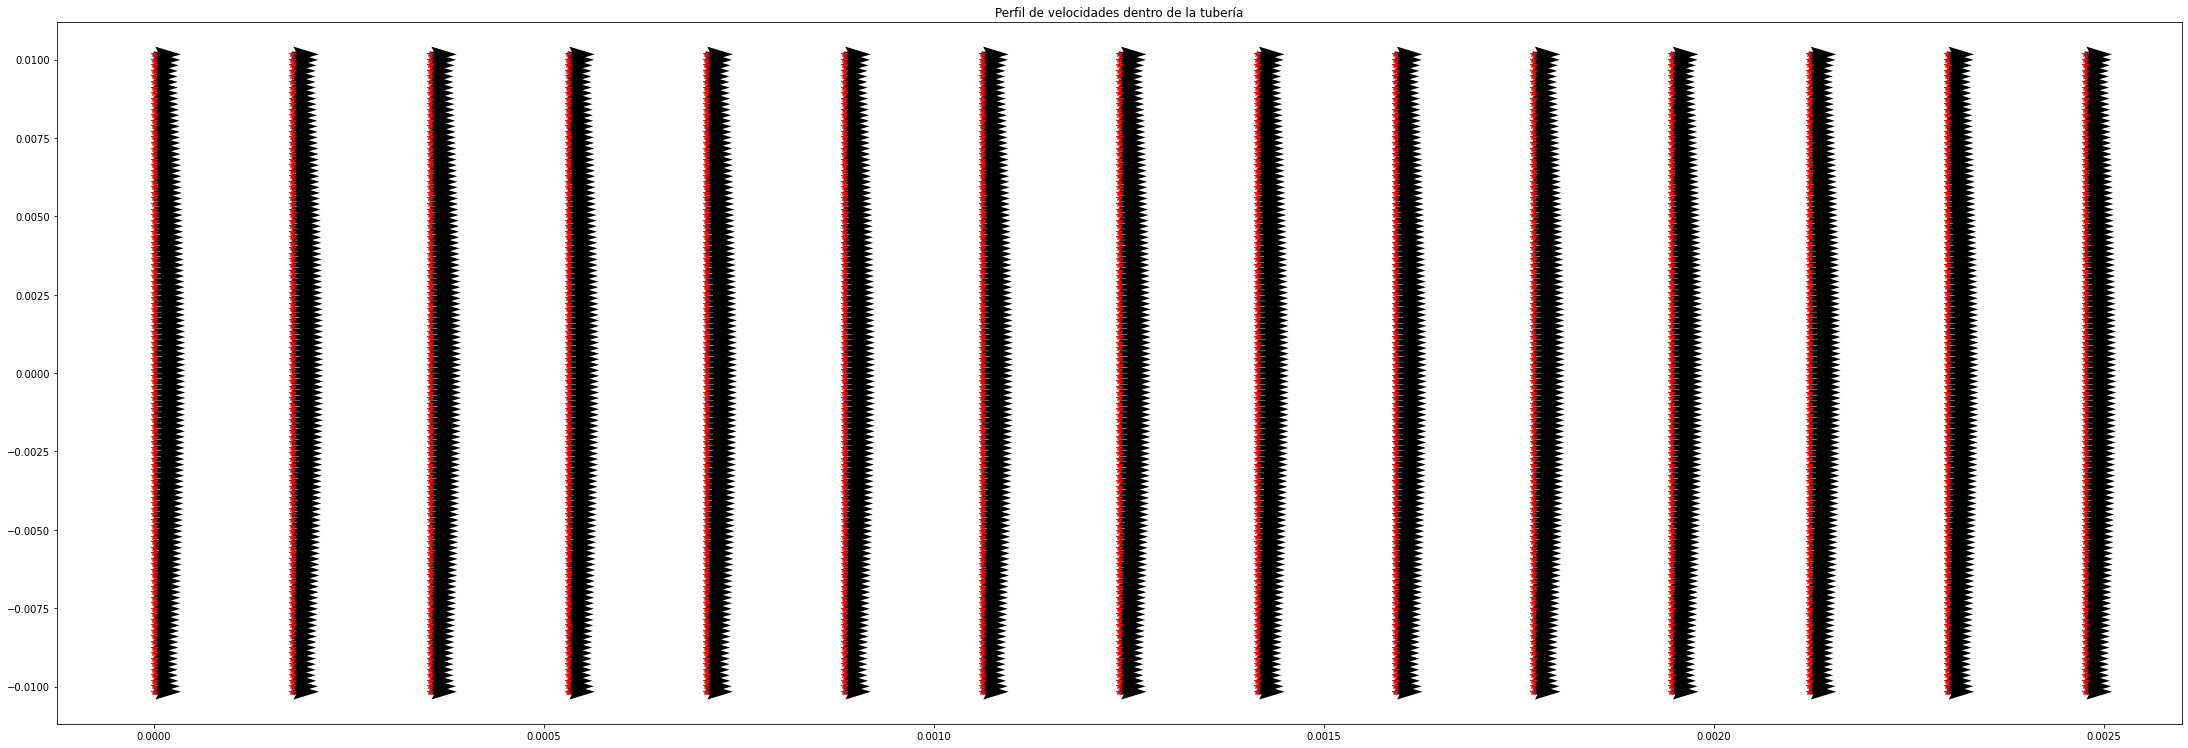

In [7]:
def eliminar_y_reemplazar(datos, reemplazo):
    # El reemplazo será el promedio de la lista sin eliminar outliers
    Q1 = np.quantile(datos, q=.25)
    Q3 = np.quantile(datos, q=.75)
    IQR = Q3 - Q1

    for i in range(116):
        for j in range(15):
            for k in range(39999):
                velocity = datos[i][j][k]
                if velocity > (Q3 + 1.5*IQR) or velocity < (Q1 - 1.5*IQR): # Condición de ser un outlier
                    datos[i][j][k] = reemplazo 
                
copia_u = u.copy()
copia_v = v.copy()

eliminar_y_reemplazar(copia_u, np.mean(copia_u))
eliminar_y_reemplazar(copia_v, np.mean(copia_v))

# Ahora vamos a graficar el perfil de velocidades con los outliers corregidos para ver si realmente conviene cambiarlos
perfil_velocidad(copia_u, copia_v)

Una vez que se reemplazan los outliers, se grafica el perfil de velocidad que se obtendría. Este perfil tiende a parecer un perfil uniforme de velocidades. Este tipo de perfil de velocidad es obtenido en fluidos ideales (es decir, cuando la viscosidad no se considera). Sin embargo, para el análisis de un flujo turbulento es necesario considerar los efectos viscosos, por lo que para el análisis de datos se decide no reemplazar los outliers por la media.

#### 2a) Calcular velocidades longitudinales y transversales medias 

A partir de los valores entregados en la base de datos, se calculan las velocidades longitudinales y transevrsales promedio. Existen tres de promedios calculados: <br>
<br>`u_promedio`: El promedio de todas las velocidades en todas las posiciones. Es un valor único y característico del flujo.
<br>`mean_u_t`: En cada tiempo, se calcula la velocidad media del campo de velocidades y se crea una lista. Posee dimensiones de 39999
<br>`mean_u_xy`: Para cada punto $(x,y)$ del espacio se calcula un valor promedio. Posee dimensiones de 116 x 15

In [6]:
# Arrays de los datos
x_array = np.array(x)
y_array = np.array(y)
u_array = np.array(u)
v_array = np.array(v)

# Velocidad longitudinal promedio
u_promedio = np.mean(u_array) # Un valor característico de todo el flujo
print(f"La velocidad longitudinal promedio es {u_promedio} m/s") # Debiese darnos 0.279 m/s

# Velocidad transversal promedio
v_promedio = np.mean(v_array) # Un valor específico de todo el flujo
print(f"La velocidad transversal promedio es {v_promedio} m/s") 

mean_u_t = u_array.mean(axis=(0,1)) # Promedio de la velocidad longitudinal en cada tiempo (lista de len = 39999)
mean_v_t = v_array.mean(axis=(0,1)) # Promedio de la velocidad transversal en cada tiempo (lista de len = 39999)

mean_u_xy = u_array.mean(axis=2) # Promedio de la velocidad longitudinal en cada punto (lista de 116 x 15)
mean_v_xy = v_array.mean(axis=2) # Promedio de la velocidad transversal en cada punto (lista de 116 x 15)

# Aprovechamos también de hacer la descomposición de Reynolds para posteriormente graficar
u_prima = mean_u_t - u_promedio
v_prima = mean_v_t - v_promedio

vel = np.linalg.norm([mean_u_t, mean_v_t], axis=0)

La velocidad longitudinal promedio es 0.28399841705259005 m/s
La velocidad transversal promedio es -0.00023552504234347524 m/s


Valores de la velocidad media obtenidos

$\bar{u} = 0.28399841705259005$ m/s
$\bar{v} = -0.00023552504234347524$ m/s

***

Una vez obtenidos estos promedios, se grafican para obtener una visualización de los valores. <br>
<br> **Gráficos velocidad v/s tiempo**: Se grafica la velocidad en función del tiempo calculada anteriormente.Además, se calcula la descomposición de Reynolds de las velocidades en función del tiempo, y se grafica.

<br> **Gráficos velocidad en función del espacio**: Para poder observar cómo se distribuyen las velocidades en el espacio, se grafica un mapa de calor para la velocidad en función del espacio.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


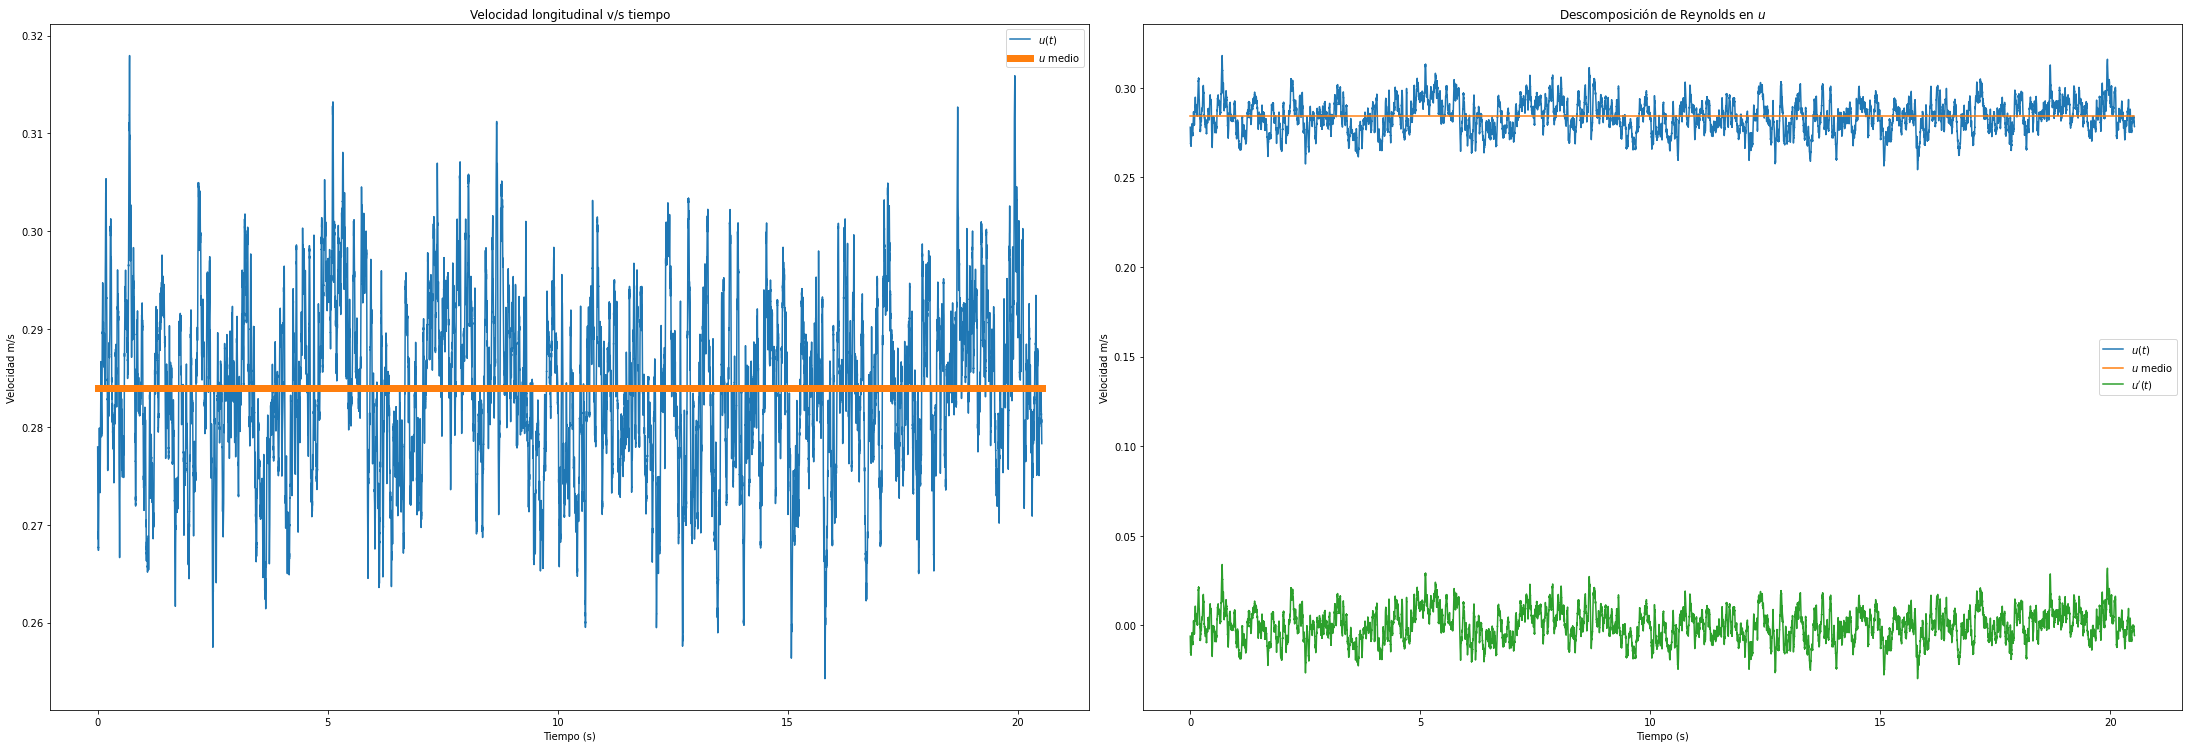

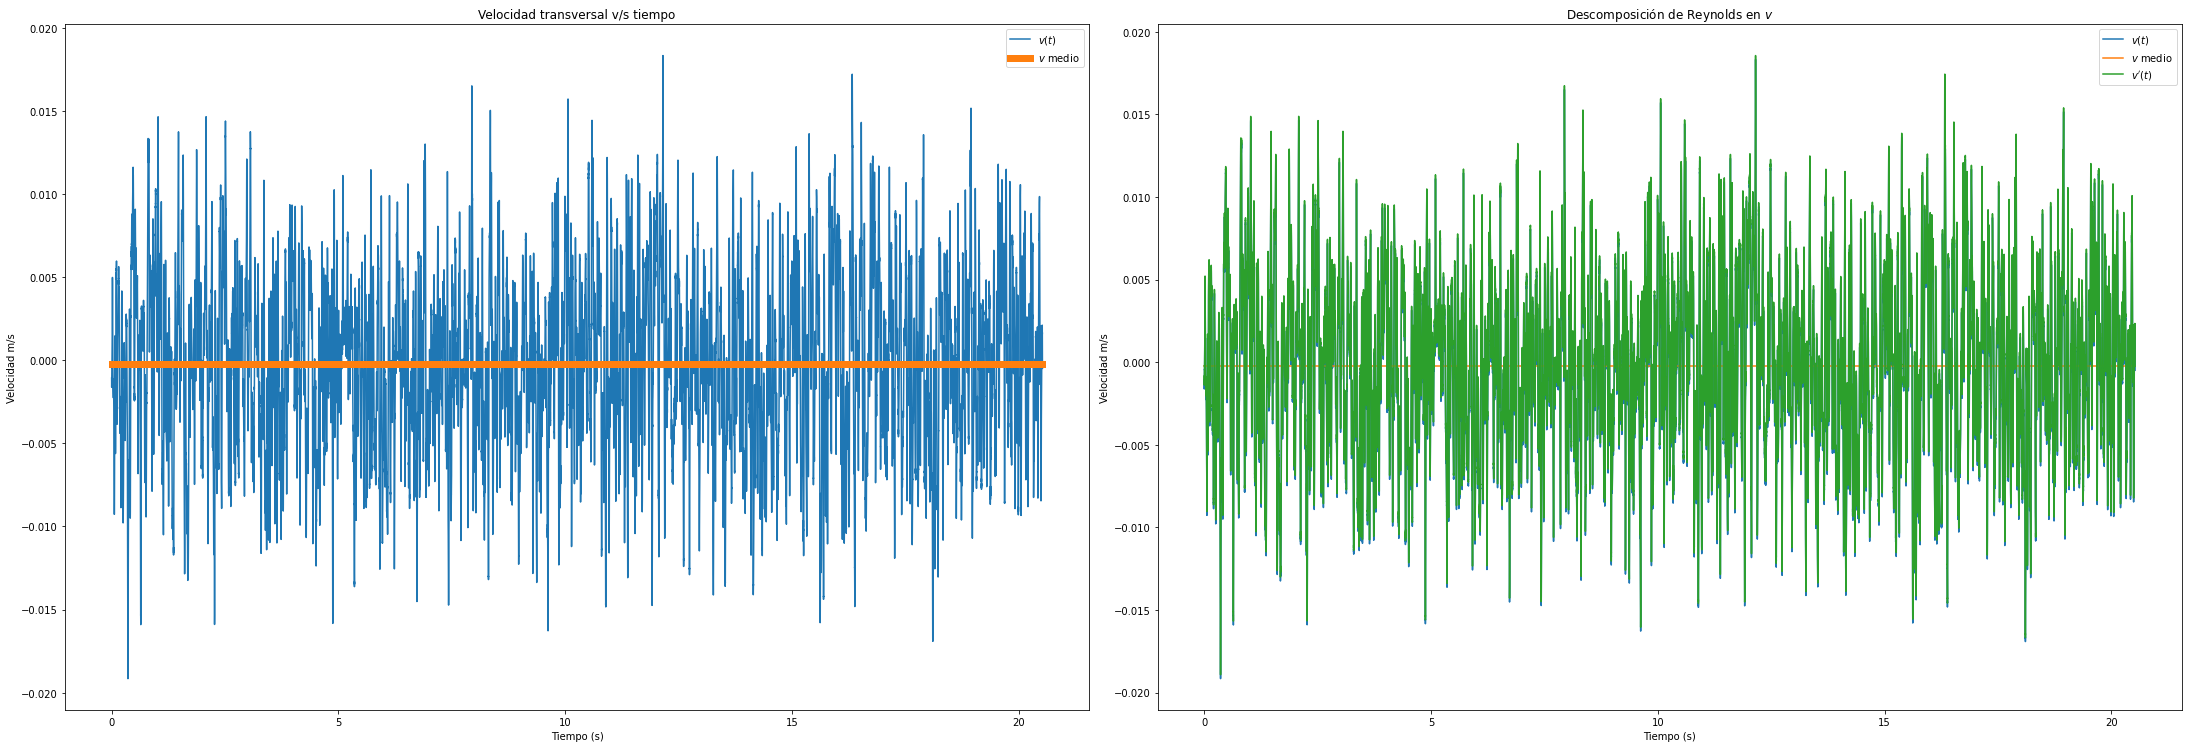

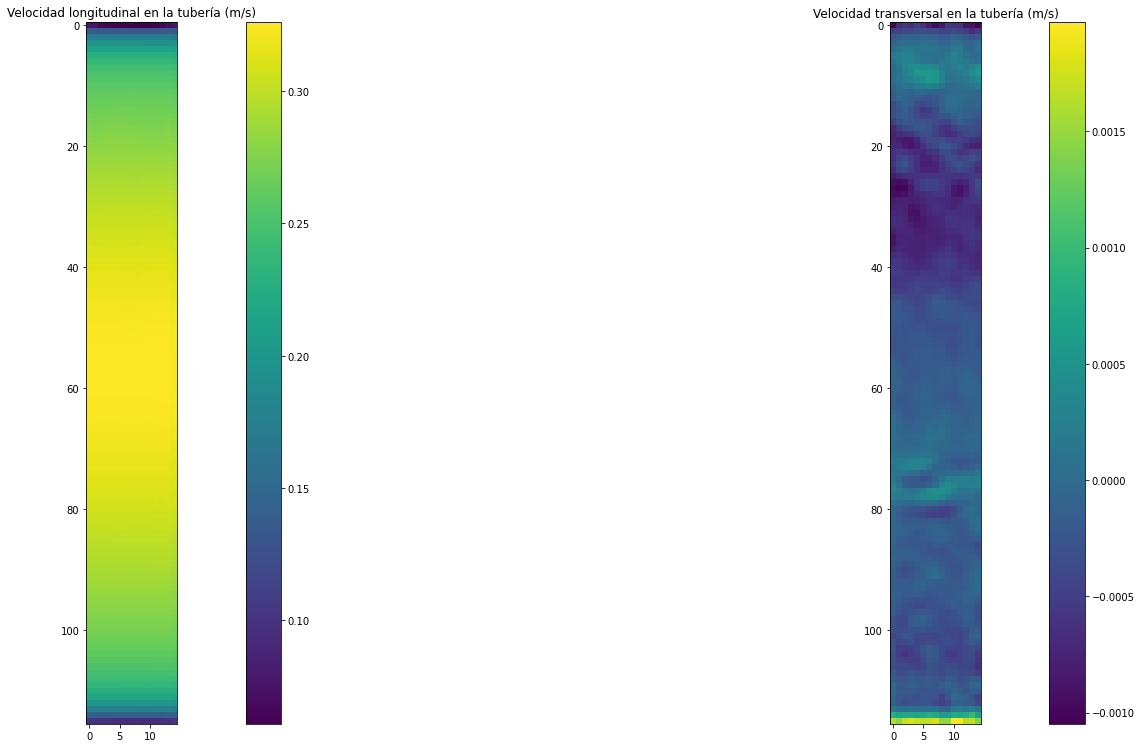

In [31]:
# Gráfico u(t) y mean(u) + u'
plt.subplot(1, 2, 1)
plt.plot(tiempo, mean_u_t, label="$u(t)$")
plt.plot([0,tiempo[-1]], [u_promedio, u_promedio], linewidth=7, label="$\bar{u}$")
plt.xlabel("Tiempo (s)")
# plt.xticks(range(0, 39999, 5000), t)
plt.ylabel("Velocidad m/s")
plt.legend(["$u(t)$", "$u$ medio"])
plt.title("Velocidad longitudinal v/s tiempo")

plt.subplot(1, 2, 2)
plt.plot(tiempo, list(u_prima + u_promedio), label="$u(t)$")
plt.plot([0,tiempo[-1]], [u_promedio, u_promedio], label="$\bar{u}$")
plt.plot(tiempo, list(u_prima), label="$u'(t)$")
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad m/s")
plt.legend(["$u(t)$", "$u$ medio", "$u'(t)$"])
plt.title("Descomposición de Reynolds en $u$")

plt.show()

# Gráfico v(t) y mean(v) + v'
plt.subplot(1, 2, 1)
plt.plot(tiempo, mean_v_t, label="$v(t)$")
plt.plot([0,tiempo[-1]], [v_promedio, v_promedio], linewidth=7, label="$\bar{v}$")
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad m/s")
plt.legend(["$v(t)$", "$v$ medio"])
plt.title("Velocidad transversal v/s tiempo")

# Esto no me está funcionando
plt.subplot(1, 2, 2)
plt.plot(tiempo, list(v_prima + v_promedio), label="$v(t)$")
plt.plot([0,tiempo[-1]], [v_promedio, v_promedio], label="$\bar{v}$")
plt.plot(tiempo, list(v_prima), label="$v'(t)$")
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad m/s")
plt.legend(["$v(t)$", "$v$ medio", "$v'(t)$"])
plt.title("Descomposición de Reynolds en $v$")

plt.show()

# Mapas de calor de la velocidad

plt.subplot(1, 2, 1)
plt.imshow(mean_u_xy)
plt.colorbar()
plt.title("Velocidad longitudinal en la tubería (m/s)")

plt.subplot(1, 2, 2)
plt.imshow(mean_v_xy)
plt.colorbar()
plt.title("Velocidad transversal en la tubería (m/s)")
plt.show()

Ahora que se calculó la velocidad media, se puede calcular el número de Reynolds del flujo usando como longitud característica el diámetro de la tubería ($Re = \frac{UD}{\nu}$)

In [8]:
reynolds_number = (u_promedio * agua["diametro"] * agua["densidad"]) / agua["viscocidad dinámica"]
reynolds_number2 = (u_promedio * agua["diametro"]) / agua["viscocidad cinemática"]
print(f"El número de Reynolds del flujo es {reynolds_number} (Calculado con densidad y viscosidad dinámica)")
print(f"El número de Reynolds del flujo es {reynolds_number2} (Calculado con viscosidad cinemática)")
# Cambia un poco al usar la viscosidad dinámica y la densidad que al usar la viscosidad cinemática

El número de Reynolds del flujo es 5952.038824588182 (Calculado con densidad y viscosidad dinámica)
El número de Reynolds del flujo es 5904.917582281576 (Calculado con viscosidad cinemática)


$$Re = \frac{UD}{\nu} = 5904.917582281576$$

#### 2.2) Calcular el campo de vorticidad medio.
<br> Recordar que $\omega_{z} = \frac{\partial v}{\partial x} - \frac{\partial u}{\partial y}$. Esta es la única componente de la vorticidad que interesa calcular, porque se posee un flujo bidimensional.
<br> Para poder realizar las derivadas, se realiza el siguiente razonamiento:
- $ \frac{\partial v}{\partial x}$: Para calcular esta derivada, primero se estudia la forma de la matriz `x`. Es una matriz de 116 x 15 con 116 filas iguales. Por tanto, para obtener las variaciones de $v$ en función de $x$ interesa estudiar cómo cambia a lo largo de cada fila.
- $ \frac{\partial u}{\partial y}$: De la misma forma, se estudia la matriz `y`. Es una matriz de 116 x 15, con 15 columnas iguales. Por tanto, para estudiar las variaciones de $u$ en función de $y$, interesa saber cómo cambia a lo largo de las columns.

Para poder calcular estas tasas de cambio, se utiliza el método `gradient` de la librería `numpy`

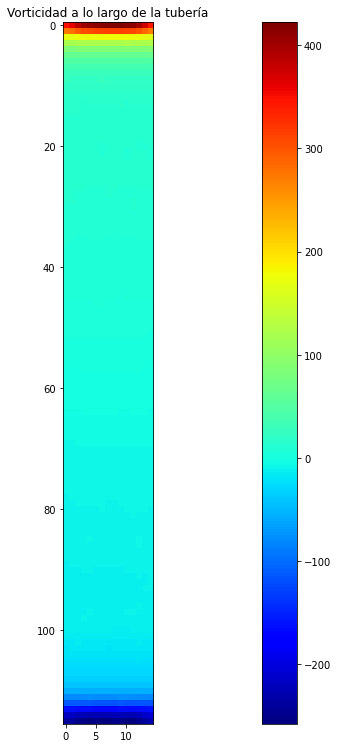

In [10]:
dvdx = list() # Velocidad longitudinal en función del largo

for i in range(116):
    dvdx.append(np.gradient(mean_v_xy[i], x[i])) # Variaciones de velocidad a lo largo del eje X
    # x[i] = dx

dudy = list()

for j in range(15):
    u_y = list() # Velocidad u en función de y
    dy = list() # Todas las posiciones de y medidas en el experimento
    for i in range(116):
        u_y.append(mean_u_xy[i][j])
        dy.append(y[i][j])

    dudy.append(np.gradient(u_y, dy))

dudy = np.transpose(dudy)


vorticidad = np.array(dvdx) - np.array(dudy)
# print(f"Derivada de V con respecto a X: {dvdx}\n")
# print(f"Derivada de U con respecto a Y: {dudy}\n")

# print(f"Shape dudy = {np.shape(dudy)}")
# print(f"Shape dvdx = {np.shape(dvdx)}")

# Gráfico del campo de vorticidad
plt.imshow(vorticidad, cmap='jet')
plt.colorbar()
plt.title("Vorticidad a lo largo de la tubería")
plt.show()

##### 3) Tensiones de corte en la pared
Las tensiones de corte en la pared pueden obtenerse según la fórmula $\tau_{xy} = \mu (\frac{\partial v}{\partial x} + \frac{\partial u}{\partial y})$. Como las derivadas fueron calculadas, se calcula directamente usando el resultado anterior y se grafica el campo de las tensiones de corte.
<br> Además, se grafican las tensiones de corte en zonas cercanas a la pared, para obtener una mejor visualización en esas zonas.

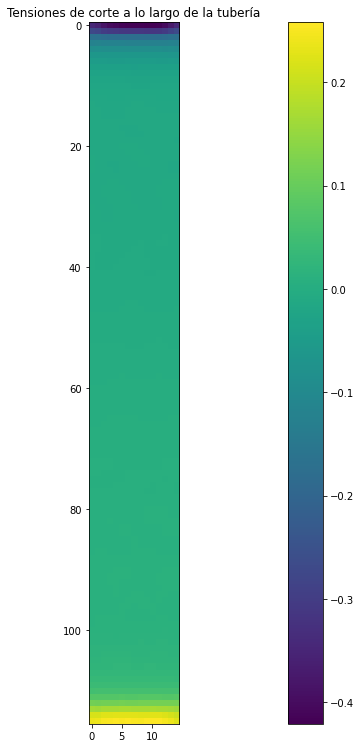

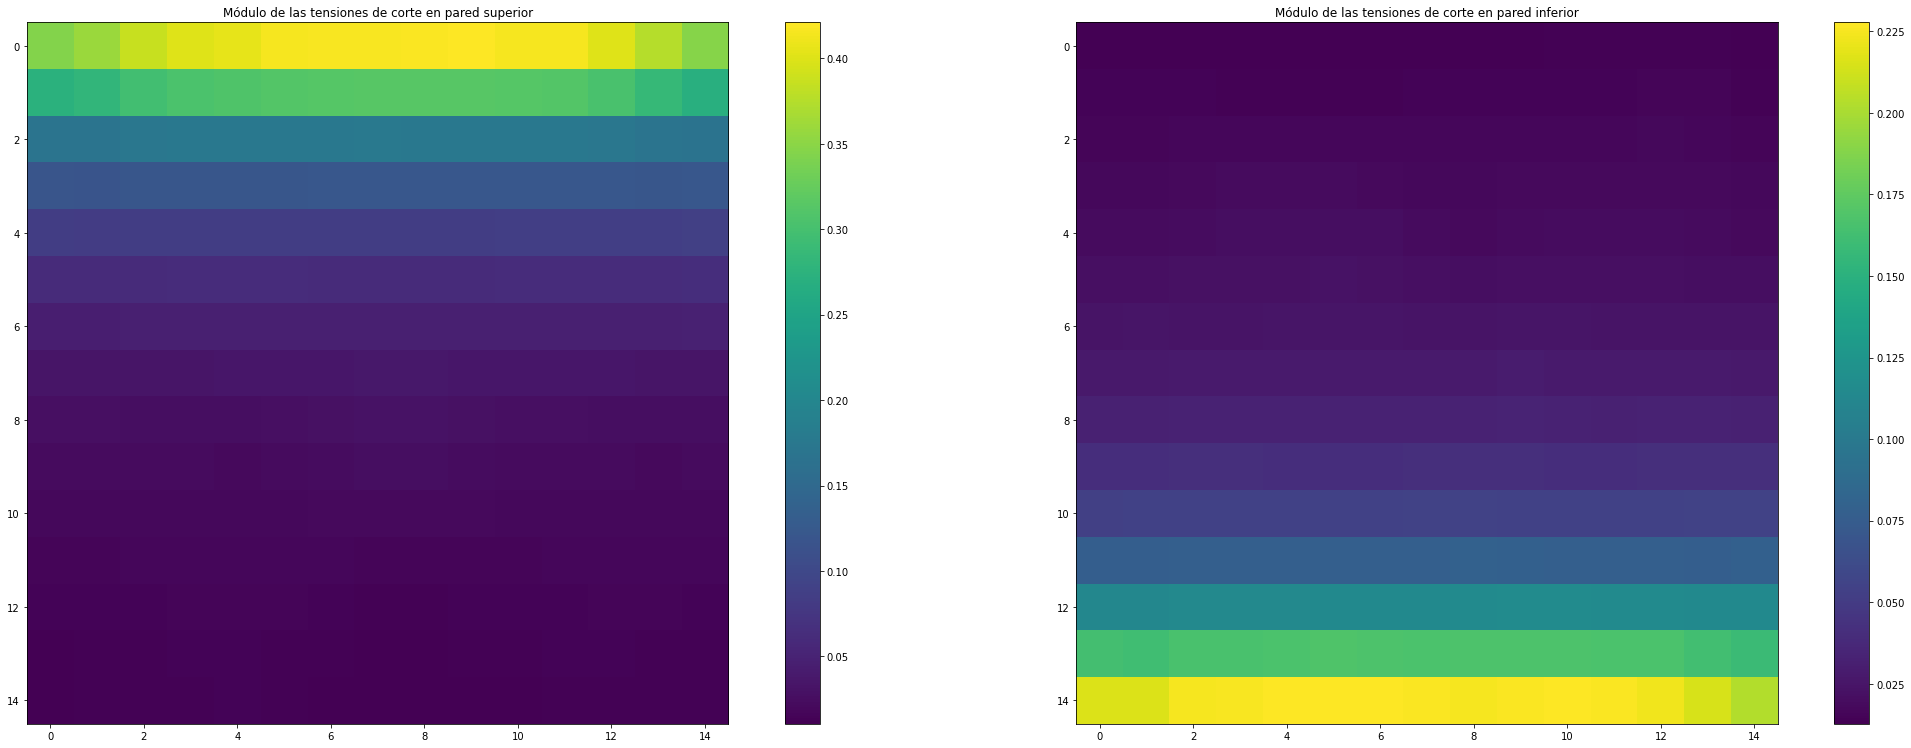

In [11]:
tau_xy = agua["viscocidad dinámica"] * (dvdx + dudy)
plt.imshow(tau_xy)
plt.colorbar()
plt.title("Tensiones de corte a lo largo de la tubería")
plt.show()

plt.subplot(1, 2, 1)
plt.imshow(np.abs(tau_xy[0:15]))
plt.colorbar()
plt.title("Módulo de las tensiones de corte en pared superior")

plt.subplot(1, 2, 2)
plt.imshow(np.abs(tau_xy[100:115]))
plt.colorbar()
plt.title("Módulo de las tensiones de corte en pared inferior")
plt.show()

#### 4) Componentes del tensor de tensiones de Reynolds. 


<br> Al calcular la correlación y agregar "full" se calcula la correlación entre todas las "diferencias de tiempo" posibles. Sólo hay que saber interpretar este resultado. Esto hay que explicarlo mejor

Tensión xy media: 9.095288091032696e-17
Tensión xx media: 1.409769654110068e-15
Tensión yy media: -7.730994877377792e-16
El tensor de Reynolds es [[[ 0.03437028  0.07398772  0.11116107 ...  0.11116107  0.07398772
    0.03437028]
  [ 0.00151936  0.00109148 -0.002771   ...  0.01850116  0.01105663
    0.00475428]]

 [[ 0.00151936  0.00109148 -0.002771   ...  0.01850116  0.01105663
    0.00475428]
  [ 0.00021017  0.00018733 -0.0002973  ... -0.0002973   0.00018733
    0.00021017]]]


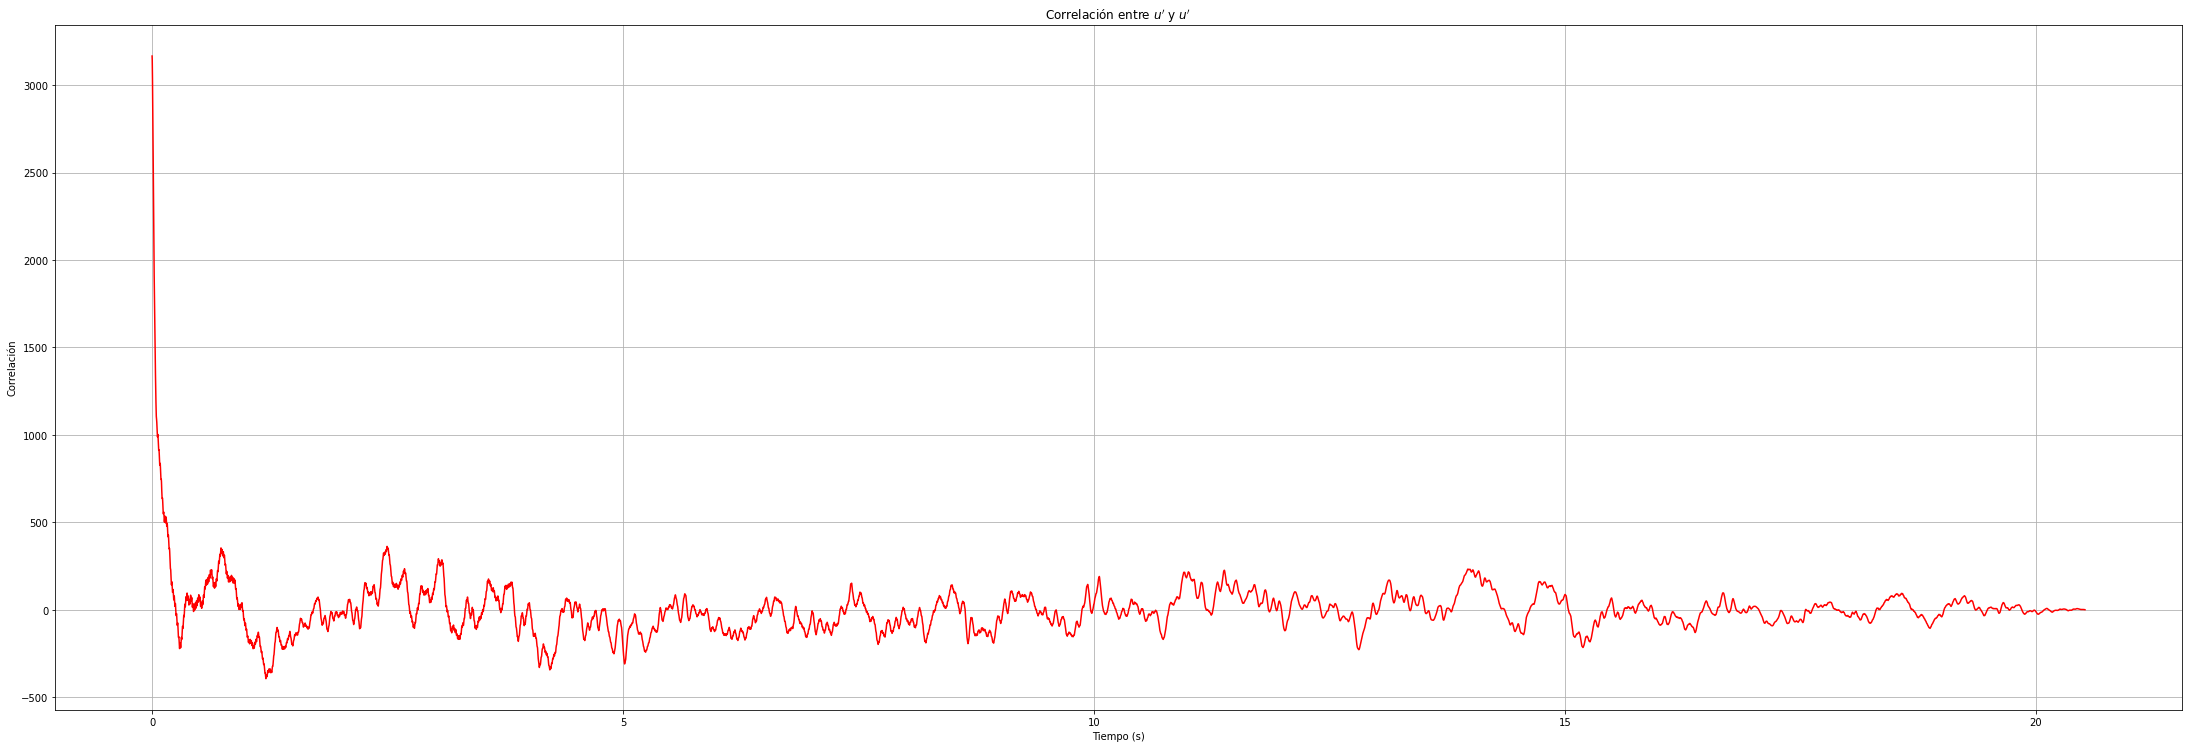

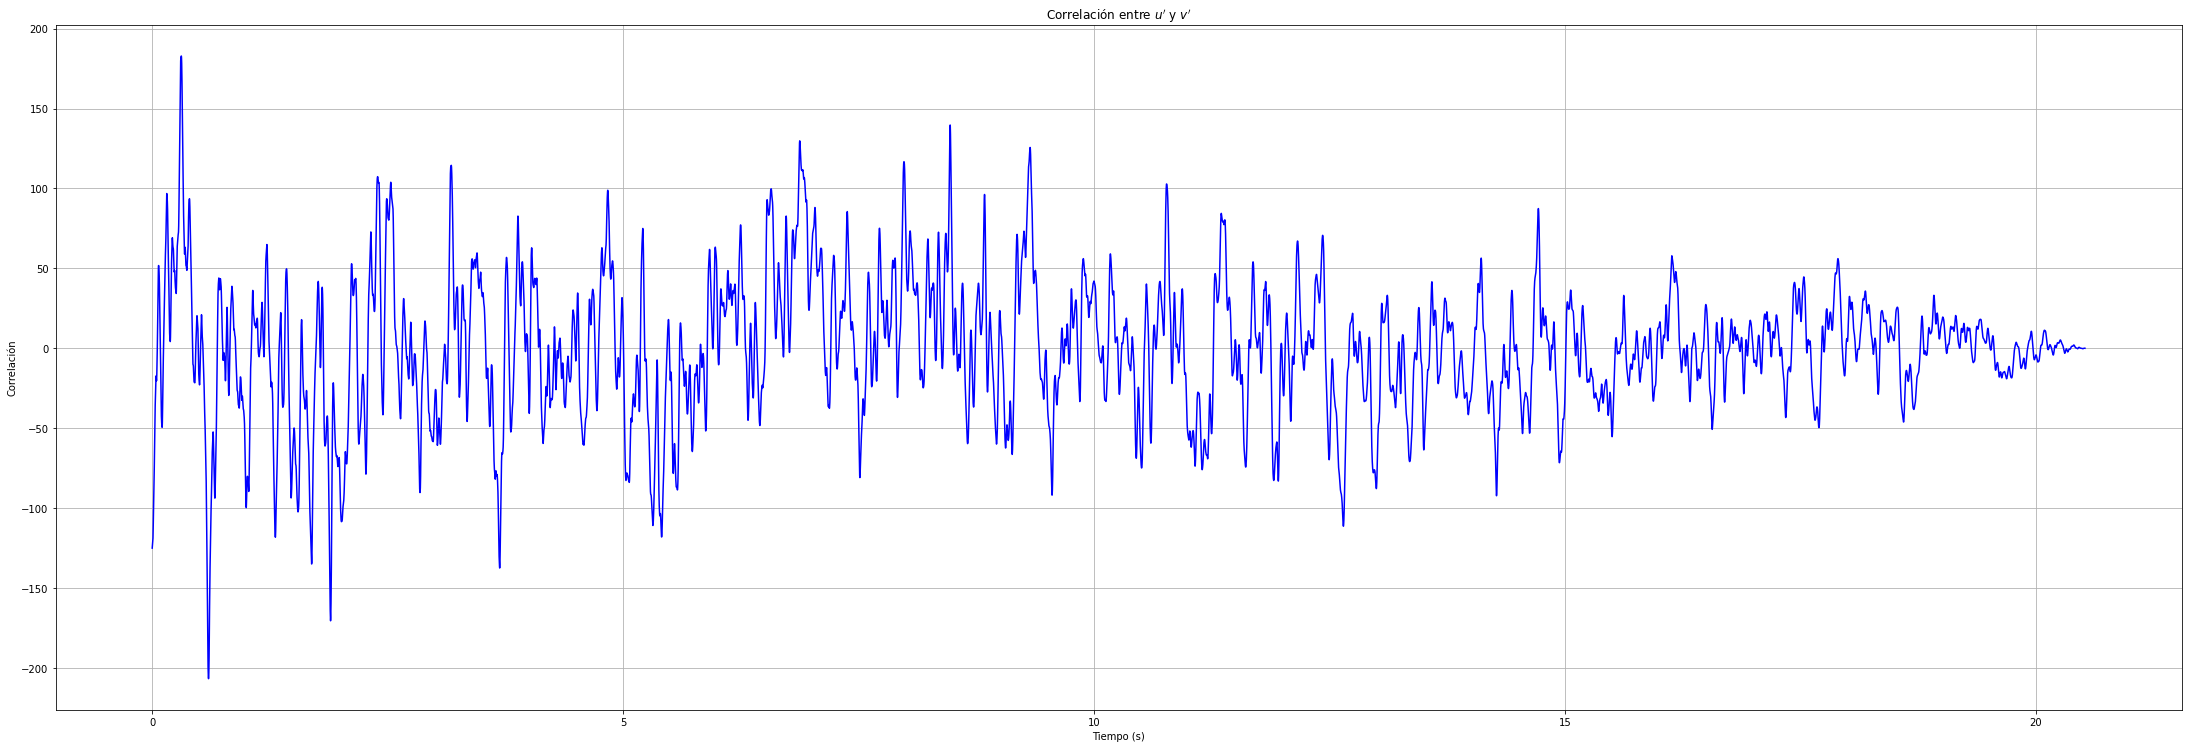

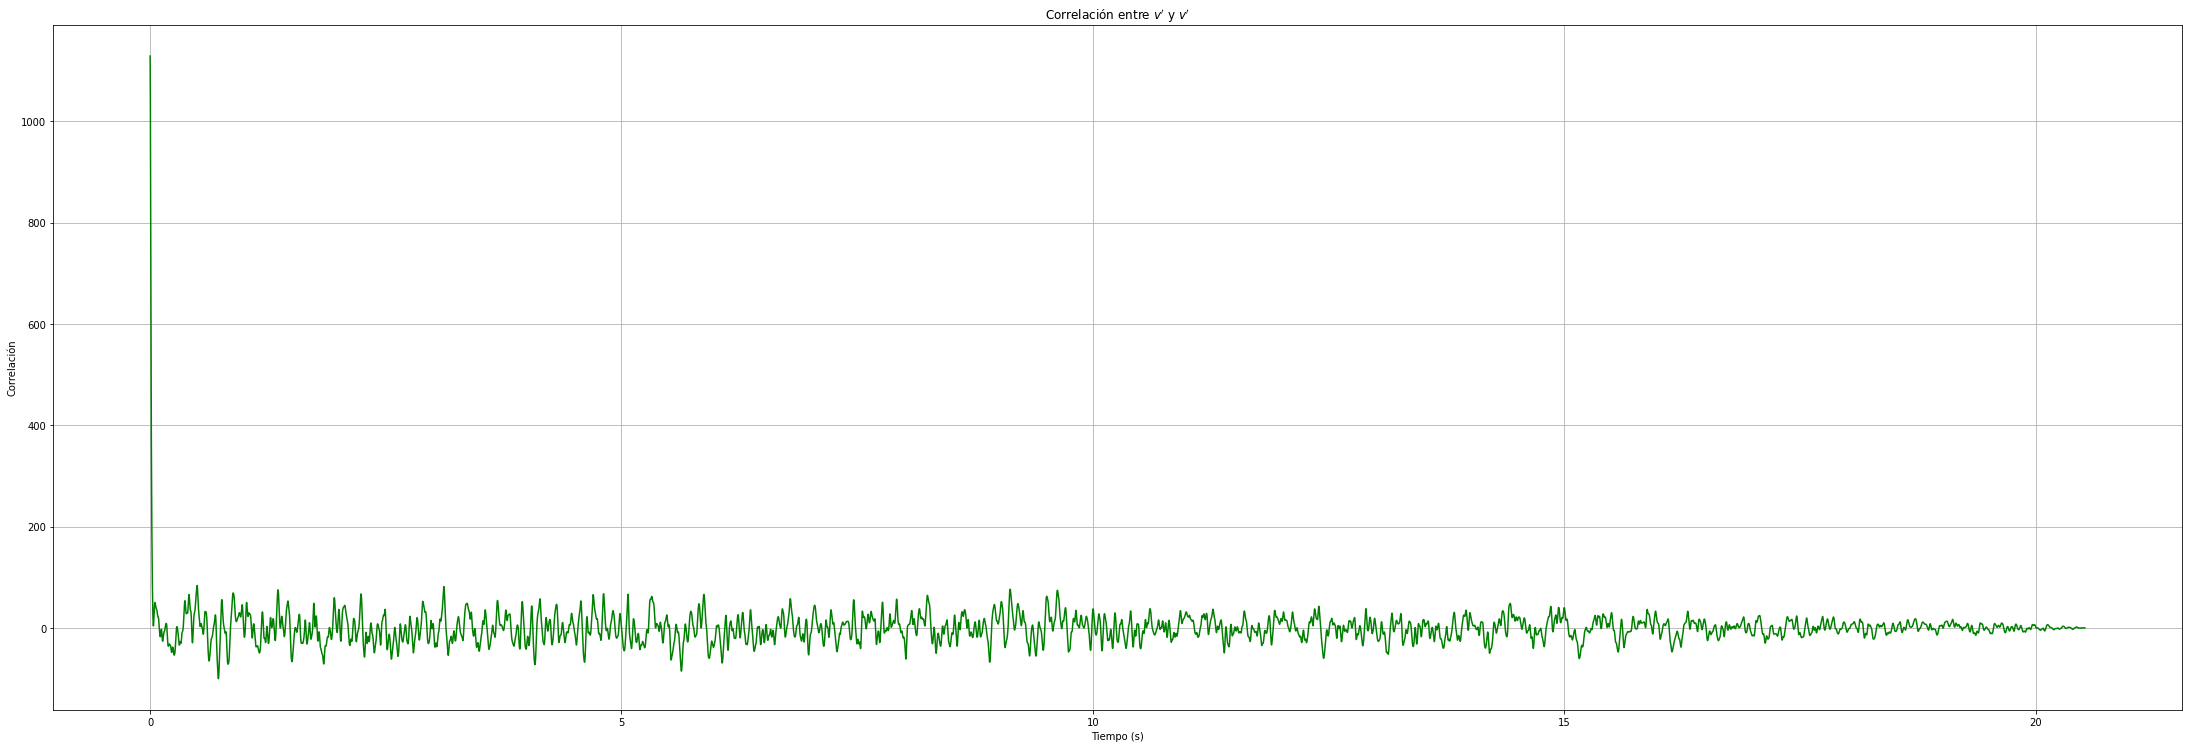

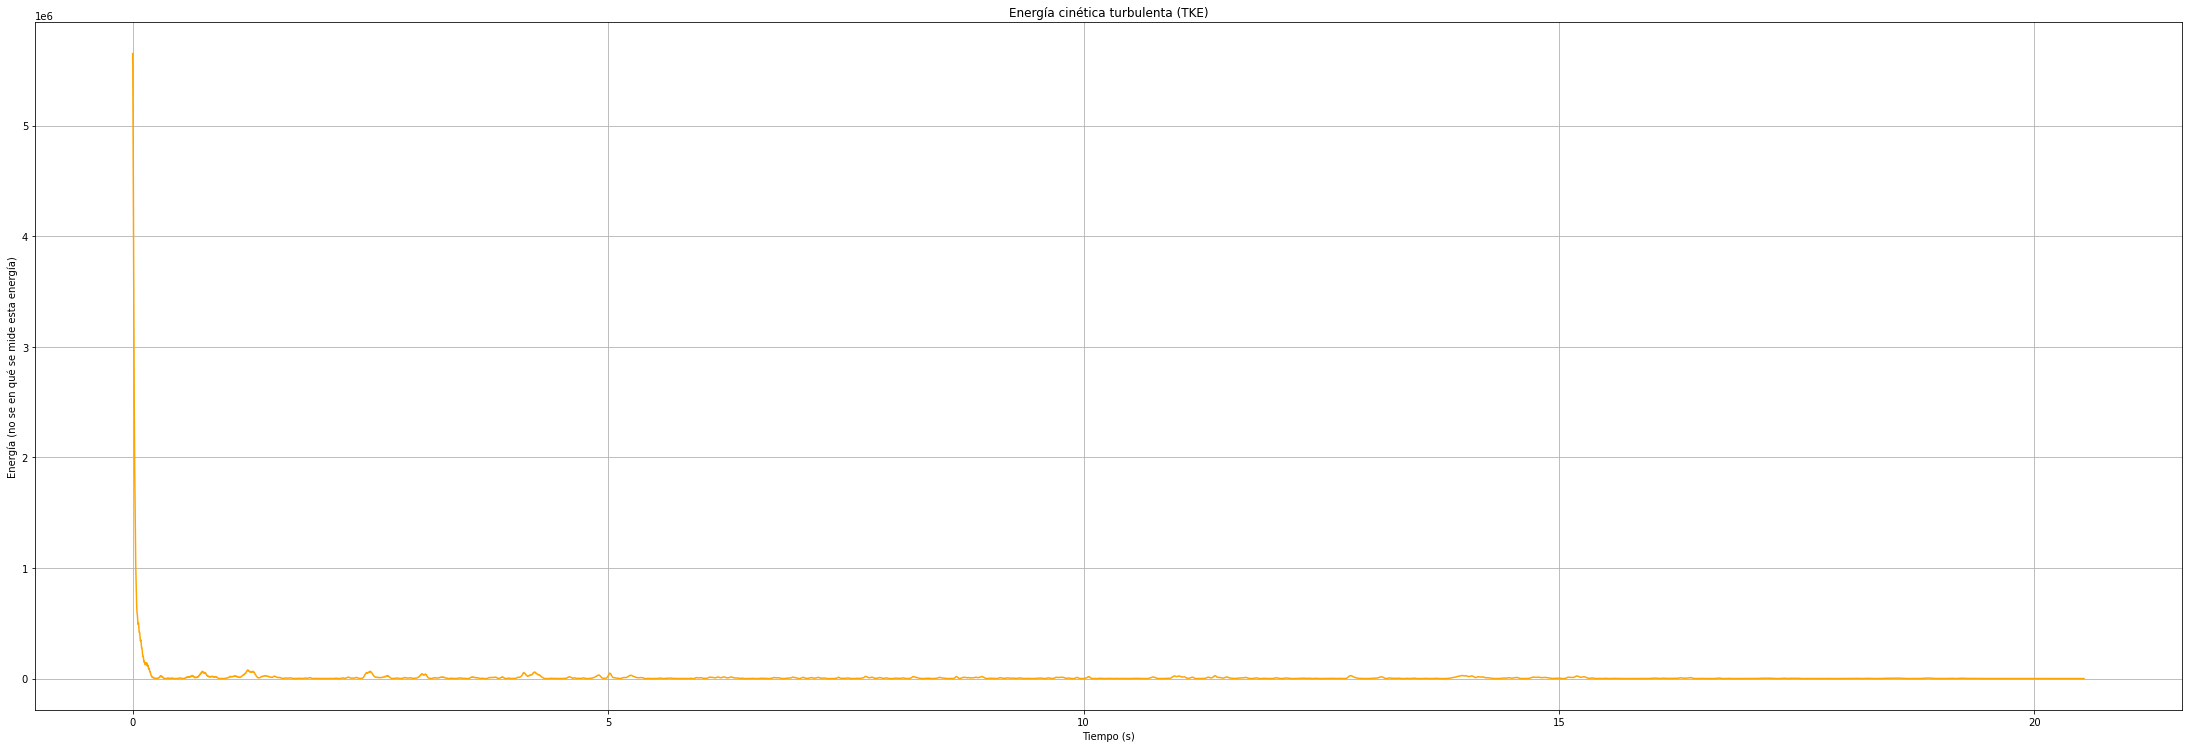

In [38]:
# fig, ax = plt.subplots(1, 3)
# ax[0].scatter(u_prima, v_prima, label="$u'v'$")
# ax[1].scatter(u_prima, u_prima, label="$u'u'$")
# ax[2].scatter(v_prima, v_prima, label="$v'v'$")
# plt.show()

reynolds_xx = np.correlate(u_prima, u_prima, "full") * agua["densidad"]
reynolds_xy = np.correlate(u_prima, v_prima, "full") * agua["densidad"]
reynolds_yy = np.correlate(v_prima, v_prima, "full") * agua["densidad"]

print(f"Tensión xy media: {np.mean(reynolds_xy)}")
print(f"Tensión xx media: {np.mean(reynolds_xx)}")
print(f"Tensión yy media: {np.mean(reynolds_yy)}")

tensor_reynolds = np.array([[reynolds_xx, reynolds_xy],
                            [reynolds_xy, reynolds_yy]])

print(f"El tensor de Reynolds es {tensor_reynolds}")

shifts = (1/1949) * np.arange(-len(v_prima) + 1, len(u_prima)) # Sólo me interesan los tiempos positivos.
t_0 = list(shifts).index(0)

# Gráficos de la correlación considerando sólo los tiempos positivos:

plt.plot(shifts[t_0:], reynolds_xx[t_0:], label="$\rho \bar{u'u'}$", color="red")
plt.xlabel('Tiempo (s)')
plt.ylabel('Correlación')
plt.title("Correlación entre $u'$ y $u'$")
plt.grid(True)

plt.show()

plt.plot(shifts[t_0:], reynolds_xy[t_0:], label="$\rho \bar{u'v'}$", color="blue")
plt.xlabel('Tiempo (s)')
plt.ylabel('Correlación')
plt.title("Correlación entre $u'$ y $v'$")
plt.grid(True)
plt.show()

plt.plot(shifts[t_0:], reynolds_yy[t_0:], label="$\rho \bar{v'v'}$", color="green")
plt.xlabel('Tiempo (s)')
plt.ylabel('Correlación')
plt.title("Correlación entre $v'$ y $v'$")
plt.grid(True)
plt.show()

# Cálculo de la energía cinética turbulenta

TKE = 0.5 * ((reynolds_yy ** 2) + (reynolds_xx ** 2))
plt.plot(shifts[t_0:], TKE[t_0:], color="orange")
plt.xlabel('Tiempo (s)')
plt.ylabel('Energía (no se en qué se mide esta energía)')
plt.title("Energía cinética turbulenta (TKE)")
plt.grid(True)
plt.show()

Falta interpretar estos datos. Intenté buscar en algún foro o algo pero no encontré nada

$$
\tau_{ij} = \begin{bmatrix}
    \tau_{xx} & \tau_{xy} \\
    \tau_{yx} & \tau_{yy}
   \end{bmatrix}
 =  \begin{bmatrix}
    0 & 0 \\
    0 & 0
   \end{bmatrix}
$$

Vamos a graficar la velocidad en un cierto punto y su descomposición de Reynolds

#### 6) Calcular el espectro de energía en la zona cercana a la pared, al centro de la tubería y en una posición entre las dos anteriores.


Se crea una función llamada `fourier_transform`, que dada una zona del espacio calcula el espectro de energía.
<br> Para poder calcular este espectro, primero se crean submatrices dependiendo de la zona en la que se desee calcular. Posteriormente, se calcula la transformada de Fourier con el método `fft` del paquete `fft` de `numpy`. Una vez obtenida la transformada, se grafica el logaritmo de esta en función del logaritmo de las frecuencias.

https://www.youtube.com/watch?v=s2K1JfNR7Sc Maestro me salvaste. Voy a intentar citarlo

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


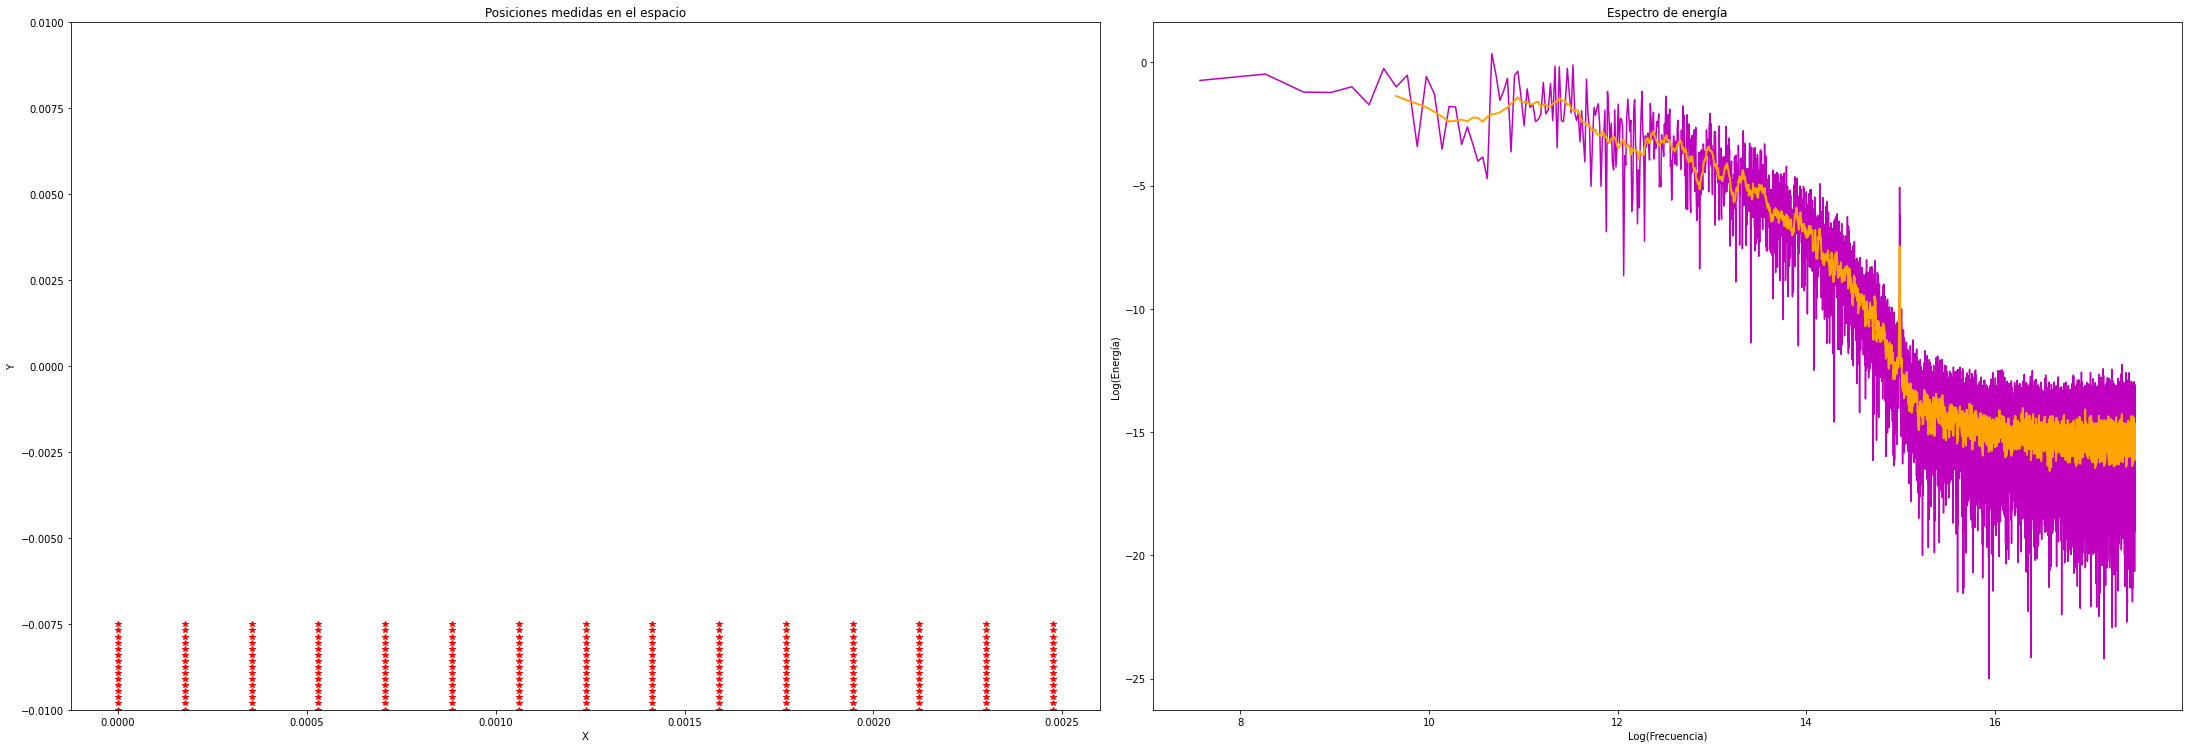

In [23]:
def fourier_transform(zone):
    # upper y lower me definirán las zonas donde tenemos que estar

    zonas = {"pared inferior": (115-15, 115),
             "pared superior": (0, 15),
             "medio": (50, 70),
             "intermedio superior": (30, 50),
             "intermedio inferior": (80, 100),
             "todo espacio": (0, 115)}

    lower, upper = zonas[zone][0], zonas[zone][1]

    # Tenemos que crear submatrices de las matrices x e y
    sub_y = y[lower:upper]
    sub_x = x[lower:upper]
    sub_u = u[lower:upper]
    sub_v = u[lower:upper]

    # Gráfico de la zona en la que estamos calculando el espectro de energía
    
    sub_u_t = np.mean(sub_u, axis=(0,1))
    sub_v_t = np.mean(sub_v, axis=(0,1))
    vel = np.linalg.norm([sub_u_t, sub_v_t], axis=0)

    # Ahora hay que calcular la transformada de Fourier

    f = vel
    n = len(vel)
    dt = 1/1949 # 1/ frecuencia
    fhat = np.fft.fft(f, n)
    psd = fhat * np.conj(fhat) / n # Amplitud
    freq = (1/dt) * np.arange(n) # Frecuencia
    L = np.arange(1, np.floor(n/2), dtype="int")

    # Graficar la transformada de Fourier y la zona en la cual la estamos calculando

    fig, ax = plt.subplots(1, 2)

    ax[0].plot(sub_x, sub_y,'r*')
    ax[0].set_title("Posiciones medidas en el espacio")
    ax[0].set_xlabel("X")
    ax[0].set_ylabel("Y")
    ax[0].set_ylim(-0.01, 0.01)

    # Ahora a graficar los logaritmos de estos datos
    filt = np.ones(15)/15
    smooth_log_psd = np.convolve(np.log(psd[L]), filt, mode="valid")

    ax[1].plot(np.log(freq[L]), np.log(psd[L]), color="m")
    ax[1].plot(np.log(freq[L])[7:-7], smooth_log_psd, color="orange", linewidth=2)
    ax[1].set_xlabel("Log(Frecuencia)")
    ax[1].set_ylabel("Log(Energía)")
    ax[1].set_title("Espectro de energía")
    plt.show()

fourier_transform("pared inferior")

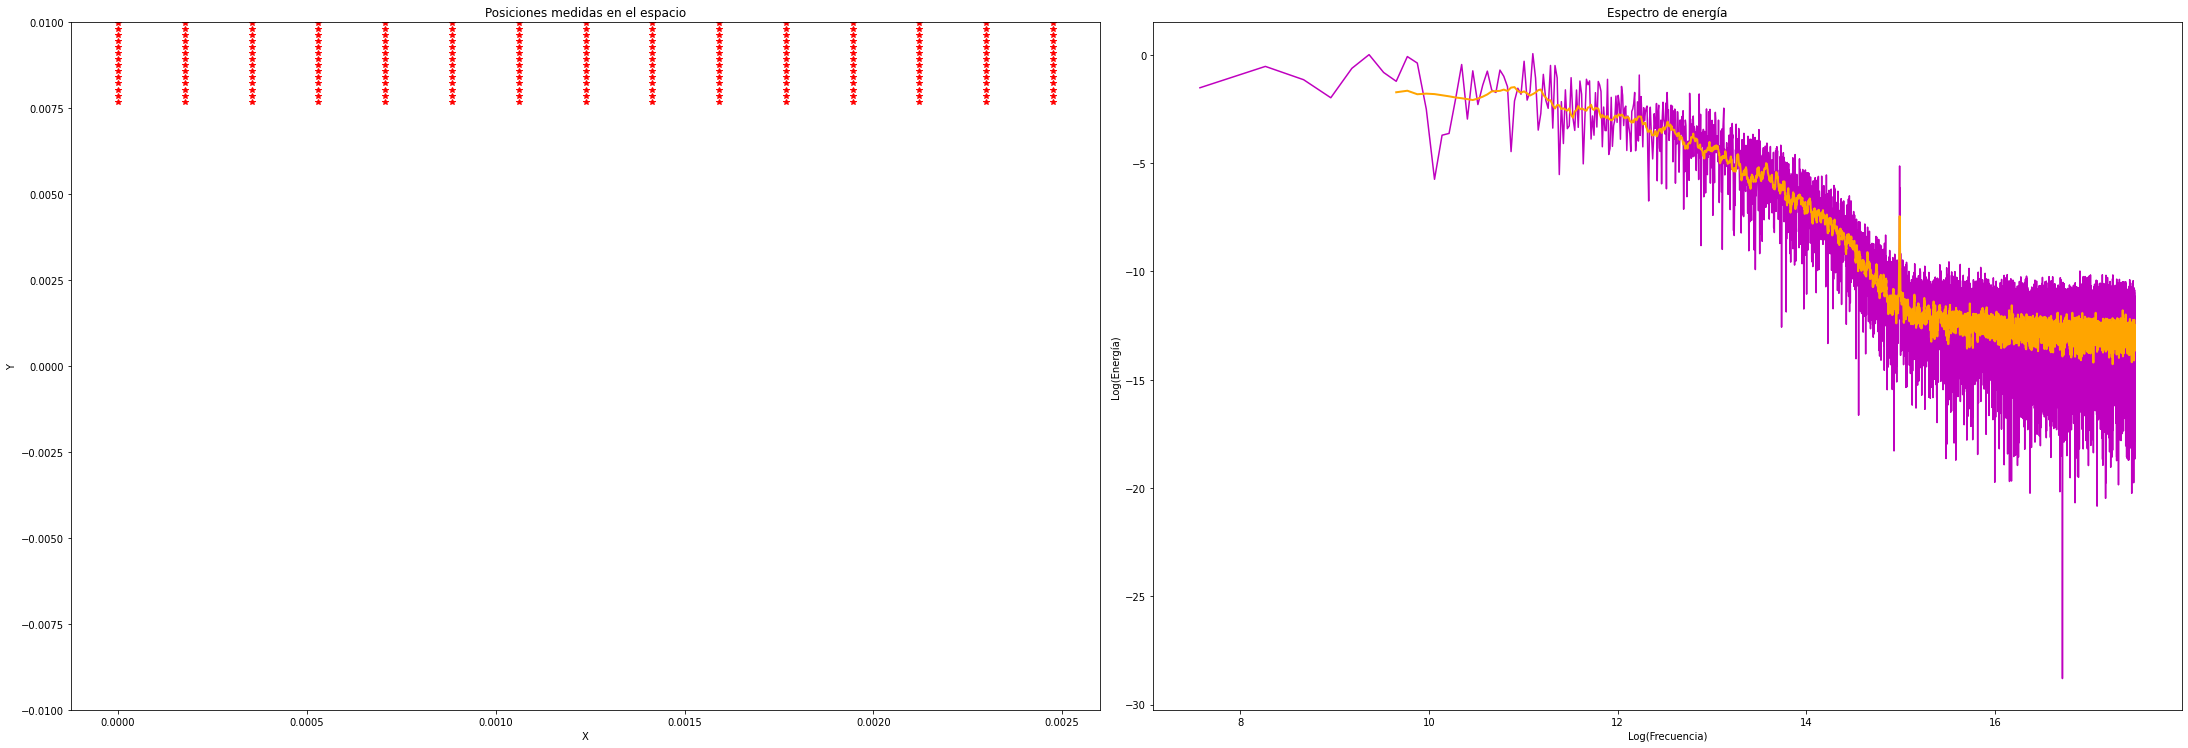

In [24]:
fourier_transform("pared superior")

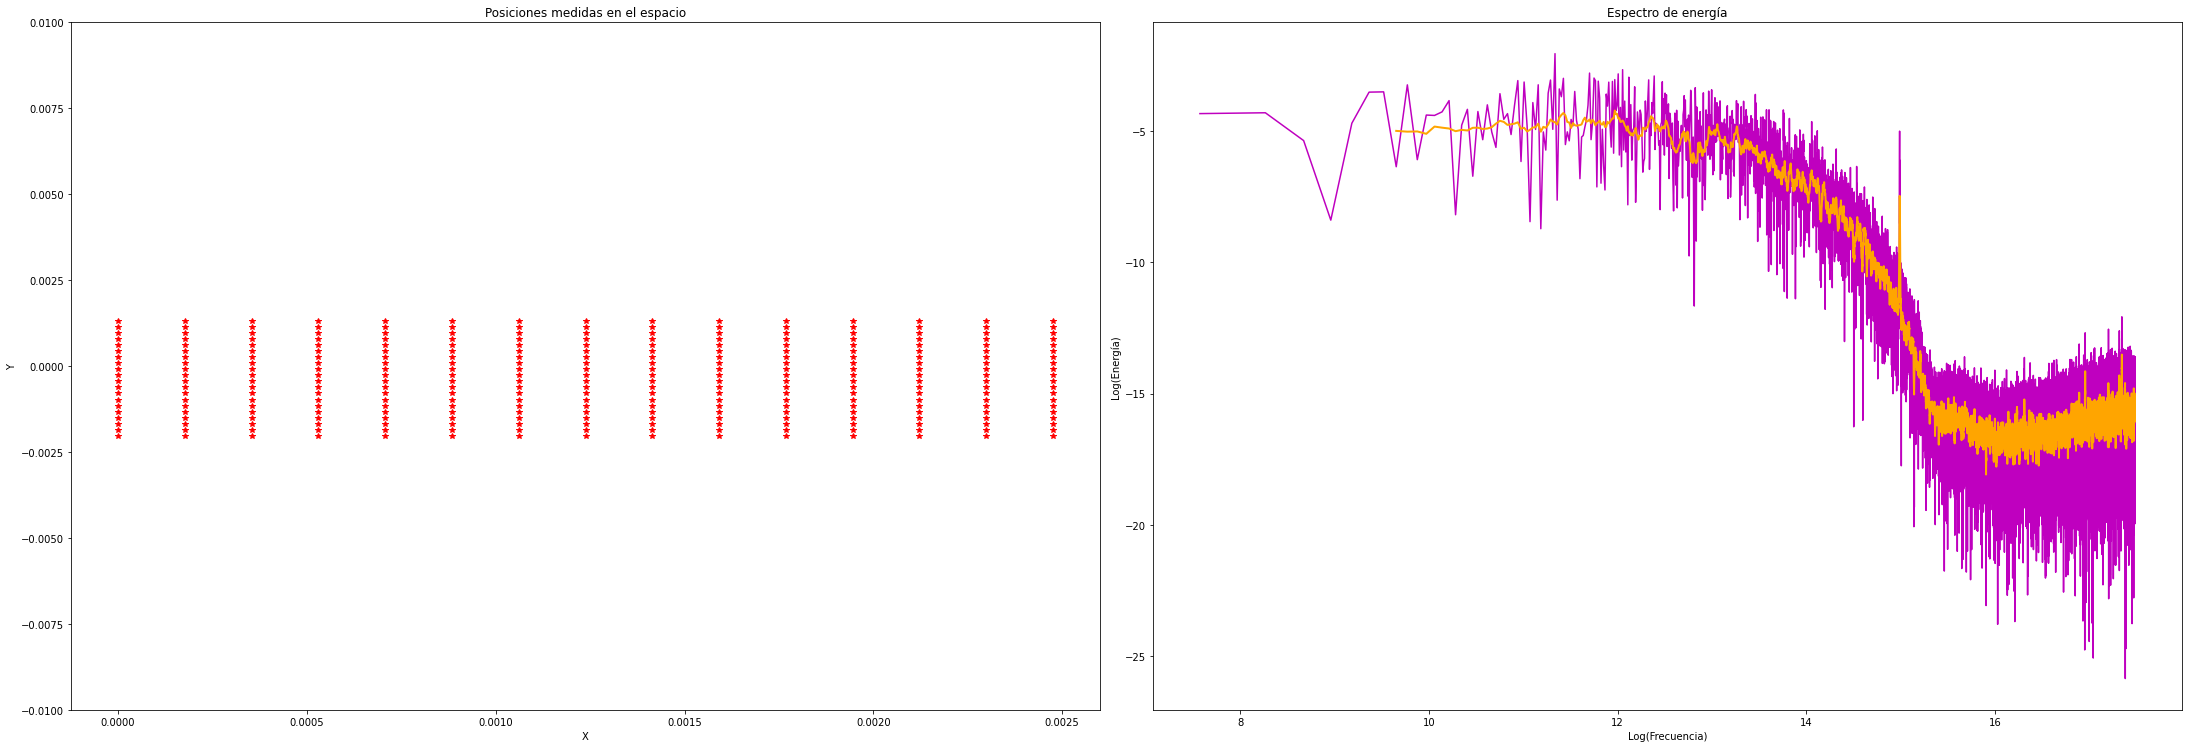

In [25]:
fourier_transform("medio")

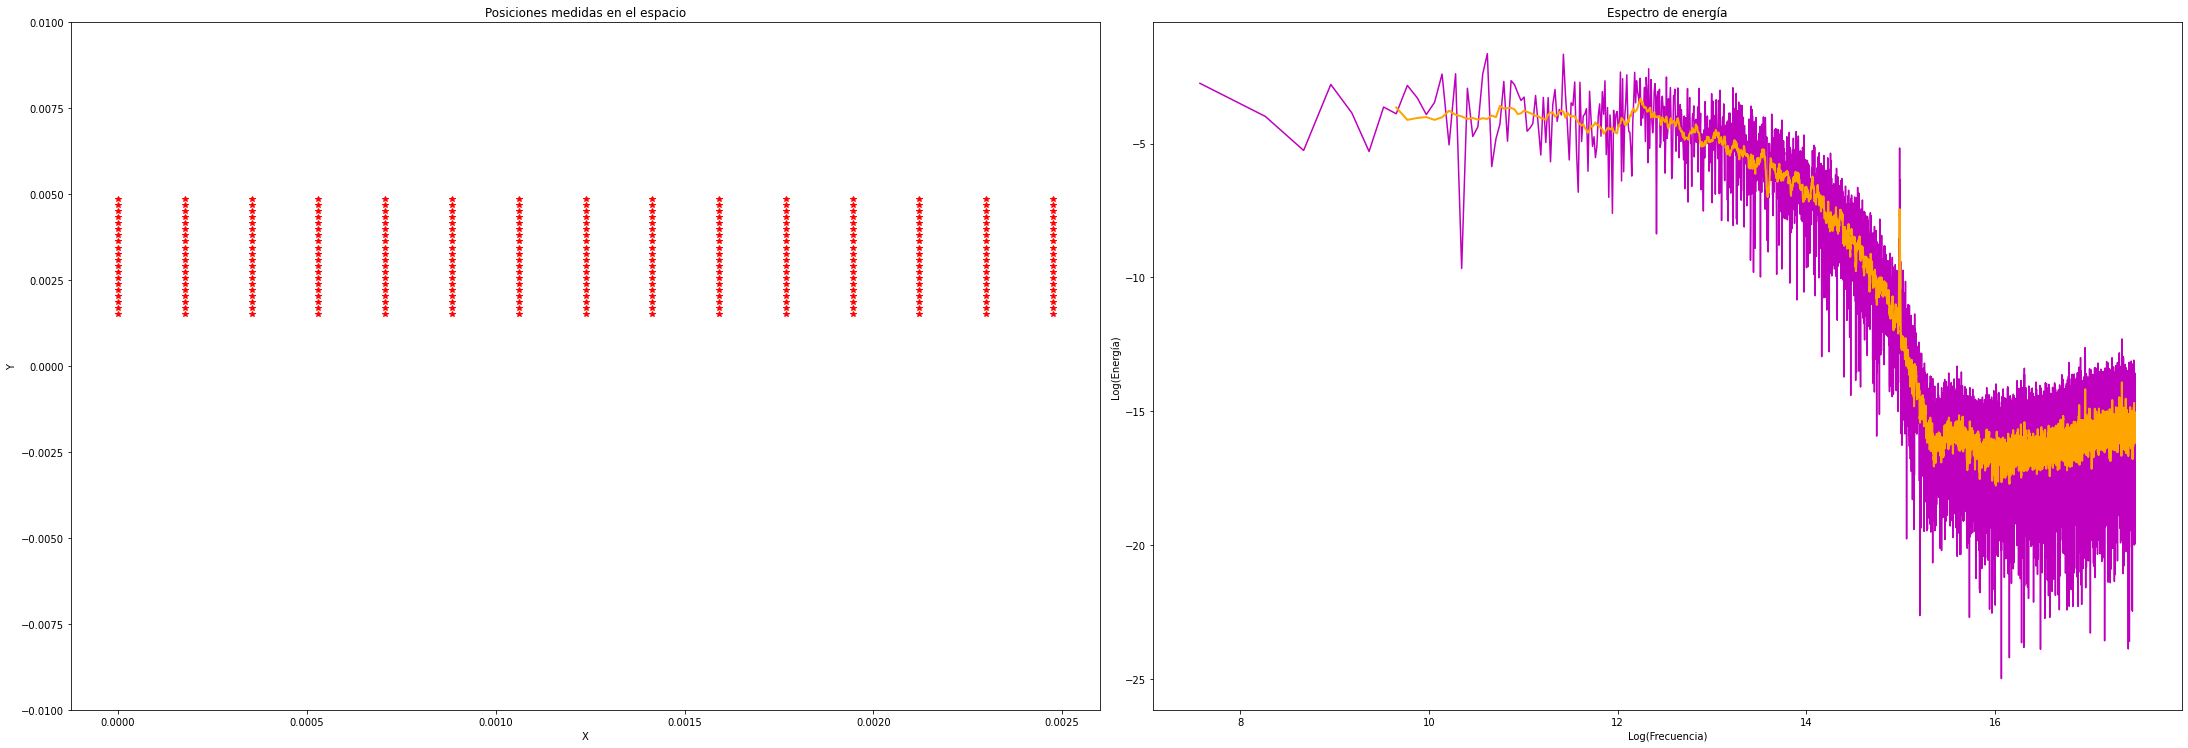

In [26]:
fourier_transform("intermedio superior")

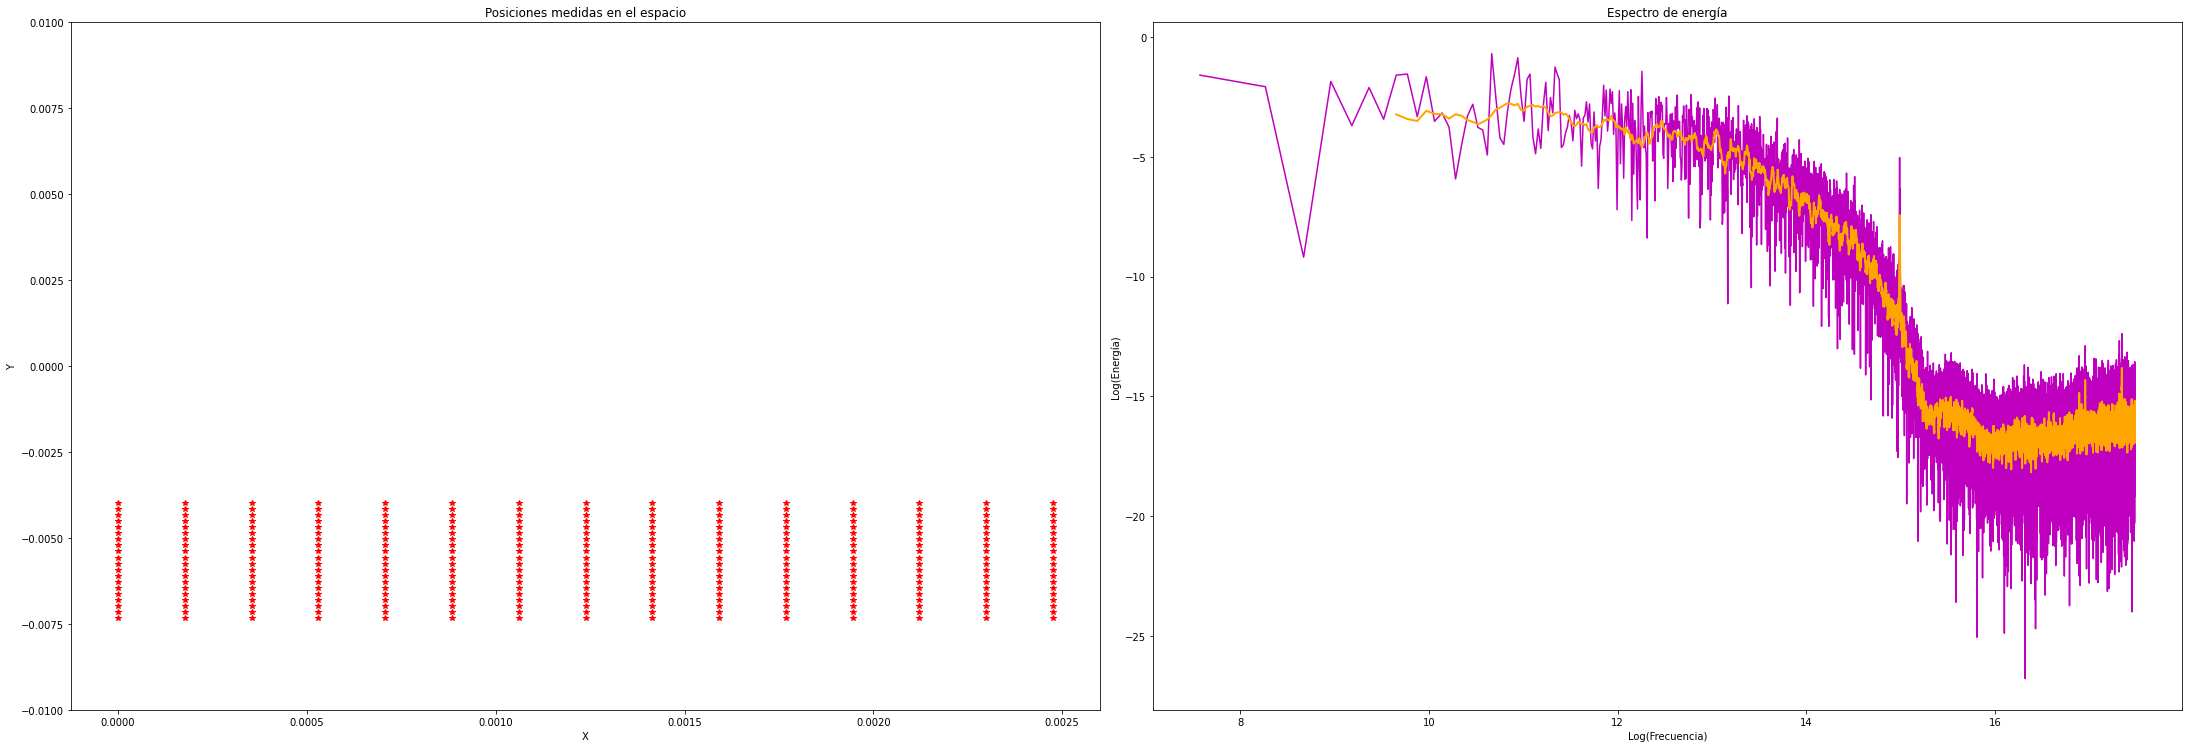

In [27]:
fourier_transform("intermedio inferior")

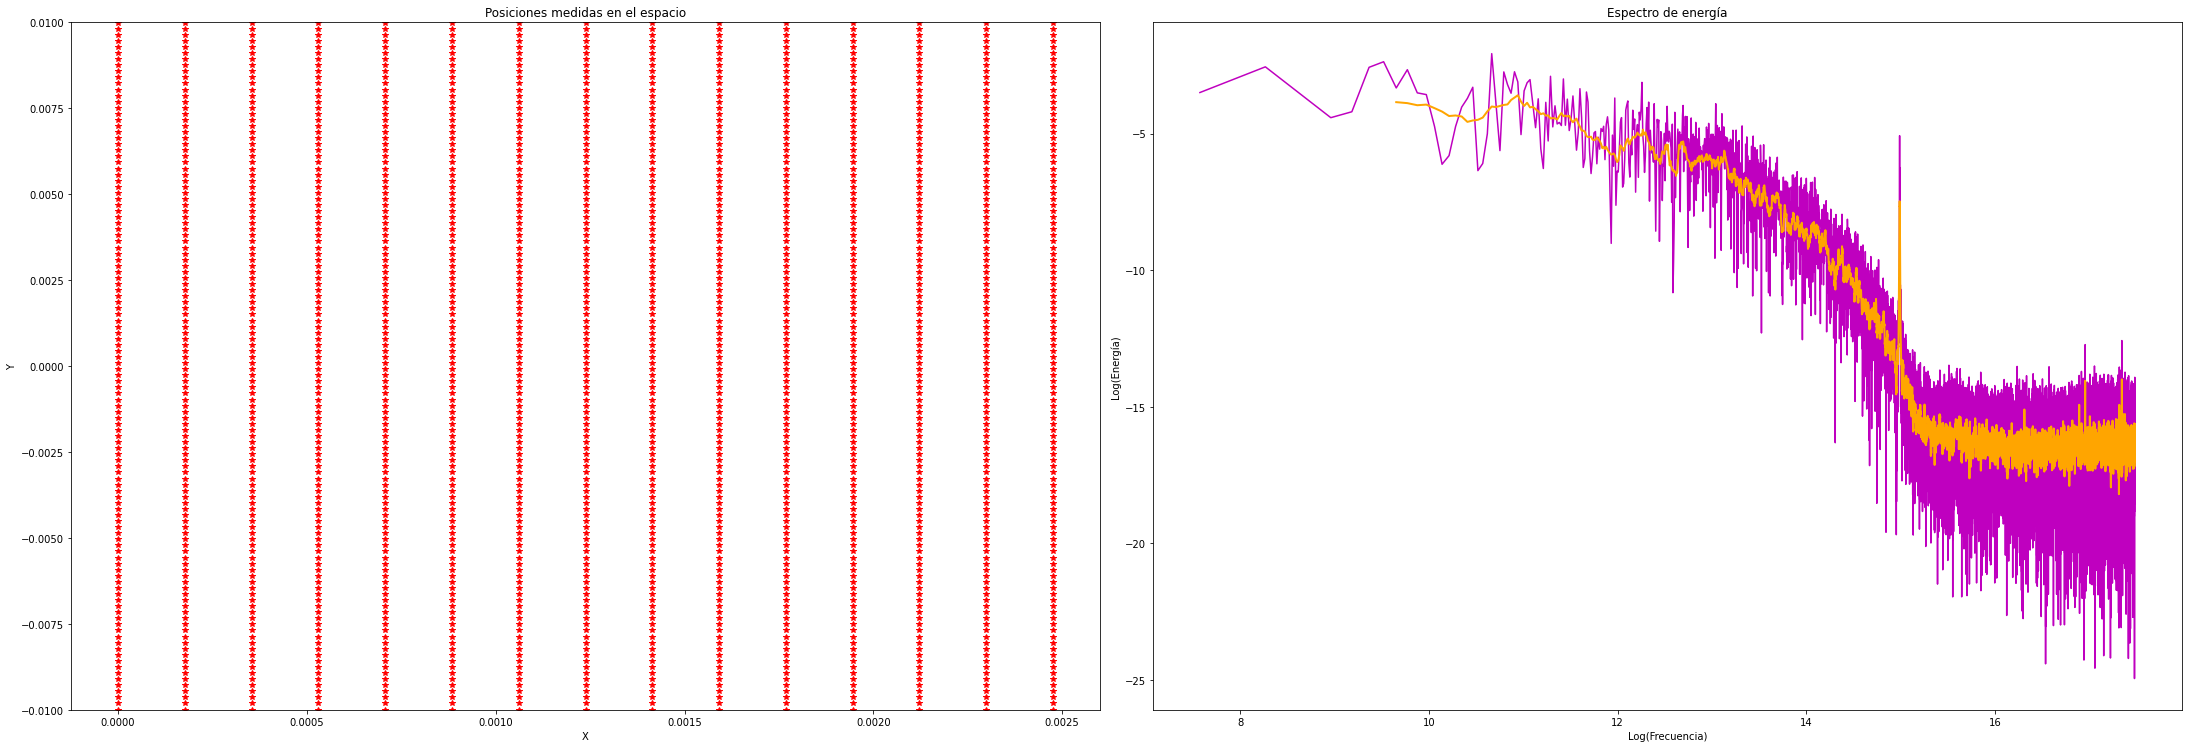

In [28]:
fourier_transform("todo espacio")

#### 7) Confiabilidad de los espectros calculados



#### 8) Análisis adicional

Se podrían calcular las escalas de Kolmogorov o algo así

## Bibliografía